This project is to predict which country scores heigest happiness index based on the given coulmns(economy, health,trust etc.)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics




In [83]:
df=pd.read_csv('happiness.csv')

In [84]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [85]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [86]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [87]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [88]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

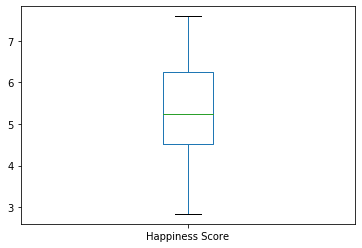

In [89]:
df['Happiness Score'].plot.box()

now here checking the corelations

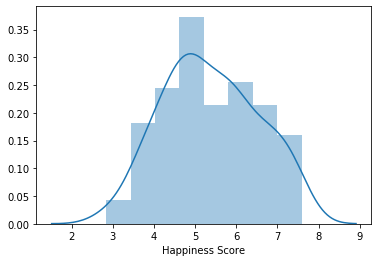

In [90]:
sns.distplot(df['Happiness Score'])

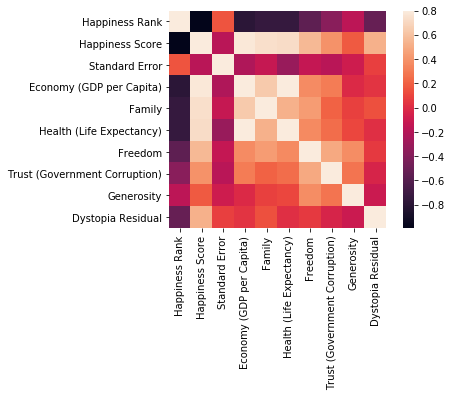

In [91]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Now going to investigate the regional happiness ranking

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

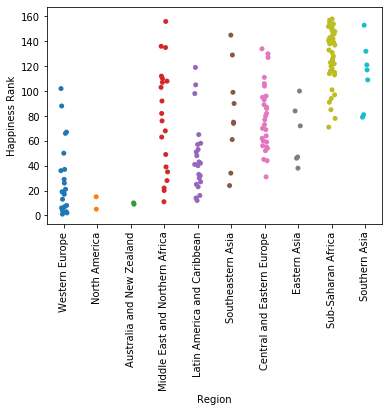

In [92]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xticks(rotation=90)

Now here I am going to investigate the global hapiness ranking

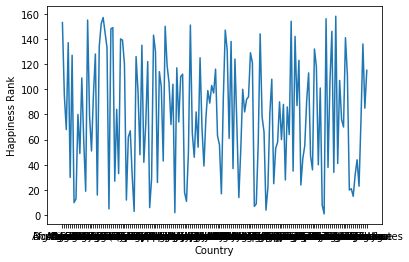

In [93]:
sns.lineplot(y='Happiness Rank',x='Country',data=df)
plt.show()

Setting up linear model to predict global happiness as the values are contineous

In [94]:
y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


In [97]:
pred = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

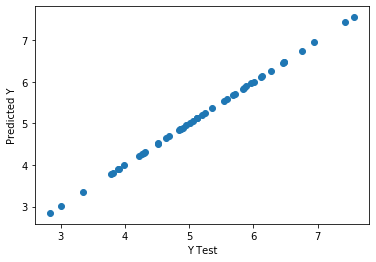

In [98]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [99]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0002686191010088194
MSE: 9.548227095653211e-08
RMSE: 0.00030900205655712406


In [100]:
co = pd.DataFrame(lm.coef_,X.columns)
co.columns = ['Coeffecient']
co

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


In [101]:
lm.score(X_train,y_train)

0.9999999449880753

In [102]:
#predict the value
pred=lm.predict(X_test)
print("predicted result :",pred)
print("actual ",y_test)

predicted result : [4.2707438  6.12271796 5.83268401 4.8577103  6.45453951 3.7807999
 5.25276766 3.89662325 6.94619608 5.36031616 4.51229833 5.00708623
 6.2692078  5.70878245 5.85522848 5.12881716 5.1937551  5.68879081
 7.42678019 7.56074954 6.47670782 5.12425961 6.13012611 5.88968665
 3.00644144 6.48508376 4.21861884 4.83934205 3.34016694 2.83909529
 3.90379867 4.89742702 4.87599388 5.95967681 5.54813853 4.64229801
 4.29244248 5.58860538 6.75011376 4.69405469 3.81930762 4.51775379
 5.12316384 4.30688469 3.98889628 4.95946562 5.05711843 6.00265085]
actual  131    4.271
42     6.123
55     5.833
101    4.857
33     6.455
145    3.781
78     5.253
142    3.896
16     6.946
74     5.360
121    4.512
92     5.007
39     6.269
64     5.709
53     5.855
84     5.129
80     5.194
66     5.689
4      7.427
1      7.561
32     6.477
85     5.124
41     6.130
50     5.890
155    3.006
31     6.485
133    4.218
102    4.839
154    3.340
157    2.839
141    3.904
96     4.898
98     4.876
48     5

In [103]:
#r2 score  ->  coefficient of determination
#is the proportion of the variancein the dependent variable that is predictable from the independent variables
# i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999168899316


In [104]:
from sklearn.linear_model import Lasso,Ridge

In [105]:
# x_train,x_test,y_train,y_test

In [106]:
#will reduce the cofficient to zero(these features are not informative)


#default value of alpha = 1.0
#aplha=.01
ls=Lasso(alpha=.01)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)

0.9903913828981068

In [107]:
ls.coef_

array([-0.        ,  1.14976909,  0.92071586,  0.82572674,  1.00572754,
        0.48132722,  0.37538487,  0.94864497])

In [108]:
#try to minimise the cofficent variance

rd=Ridge(alpha=0.01)

rd.fit(X_train,y_train)
rd.score(X_train,y_train)

0.9999991439117031

In [109]:
rd.coef_

array([-0.01053988,  1.00154673,  0.99913027,  0.99813713,  0.9997028 ,
        0.9950961 ,  0.99410007,  0.99949986])

In [110]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(X_train,y_train)
enrpred=enr.predict(X_test)
print(enr.score(X_train,y_train))
enr.coef_



0.0


array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [111]:
from sklearn.svm import SVR
svr=SVR(kernel = "linear")
svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_y=svr.predict(X_test)
print(svr.score(X_train,y_train))


svr=SVR(kernel = "poly")
svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_y=svr.predict(X_test)
print(svr.score(X_train,y_train))


svr=SVR(kernel = "rbf")
svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_y=svr.predict(X_test)
print(svr.score(X_train,y_train))


0.9976464973355553
0.9763526033609319
0.9922042141988359


In [112]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,y_train)
    print(sv.score(X_train,y_train))

0.9976464973355553
0.9763526033609319
0.9922042141988359


In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corrosponding to random state ",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print()
print("max r2 score corrosponding to",final_r_state,"is",max_r_score)

r2_score corrosponding to random state  42 is 0.9999999472734886
r2_score corrosponding to random state  43 is 0.9999999407977722
r2_score corrosponding to random state  44 is 0.9999999499037878
r2_score corrosponding to random state  45 is 0.9999999410831234
r2_score corrosponding to random state  46 is 0.9999999451998752
r2_score corrosponding to random state  47 is 0.9999999153944759
r2_score corrosponding to random state  48 is 0.999999920058267
r2_score corrosponding to random state  49 is 0.9999999271992113
r2_score corrosponding to random state  50 is 0.9999999322783788
r2_score corrosponding to random state  51 is 0.9999999232597014
r2_score corrosponding to random state  52 is 0.9999999478485404
r2_score corrosponding to random state  53 is 0.9999999194804718
r2_score corrosponding to random state  54 is 0.9999999650803177
r2_score corrosponding to random state  55 is 0.9999999330223912
r2_score corrosponding to random state  56 is 0.9999999450560921
r2_score corrosponding to 

In [114]:
#cross validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9999999373349221
RMSE is:  0.00029677679651094645


In [115]:
# Now saving the model using joblib
from sklearn.externals import joblib
# save the model using pickle in a file
joblib.dump(lm,'lm_happiness.pkl')

['lm_happiness.pkl']